# Task 1: Exploratory Data Analysis (EDA) on Online Retail Dataset
# Author: Syed Huzaifa Bin Khamis | Nexus AI Digital Internship

# 1. Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# 2. Load Dataset


In [22]:
df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 3. Data Cleaning


In [23]:
# Check missing values
print(df.isnull().sum())

# Drop rows with missing CustomerID (if crucial)
df = df.dropna(subset=['CustomerID'])

# Remove duplicates
df = df.drop_duplicates()

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert data types
df['CustomerID'] = df['CustomerID'].astype(int)

print("Shape after cleaning:", df.shape)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Shape after cleaning: (401604, 8)


# 4. Descriptive Statistics

In [24]:
print(df[['Quantity','UnitPrice']].describe())

# Create a new column for Total Sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

print("Sales Stats:")
print(df['TotalSales'].describe())

            Quantity      UnitPrice
count  401604.000000  401604.000000
mean       12.183273       3.474064
std       250.283037      69.764035
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000
Sales Stats:
count    401604.000000
mean         20.613638
std         430.352218
min     -168469.600000
25%           4.250000
50%          11.700000
75%          19.800000
max      168469.600000
Name: TotalSales, dtype: float64


# 5. Visualizations

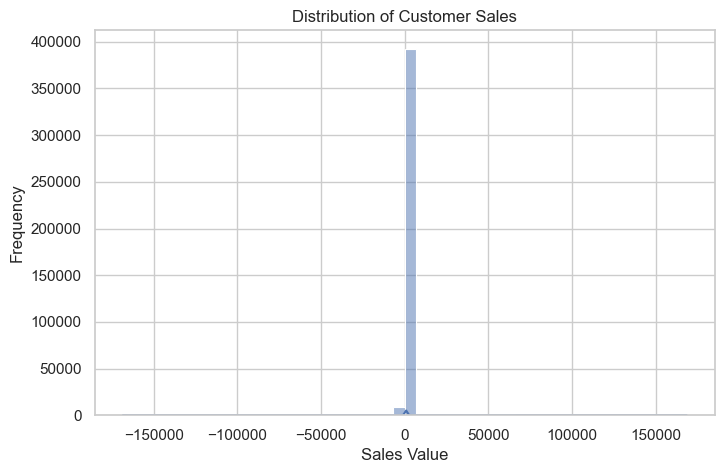

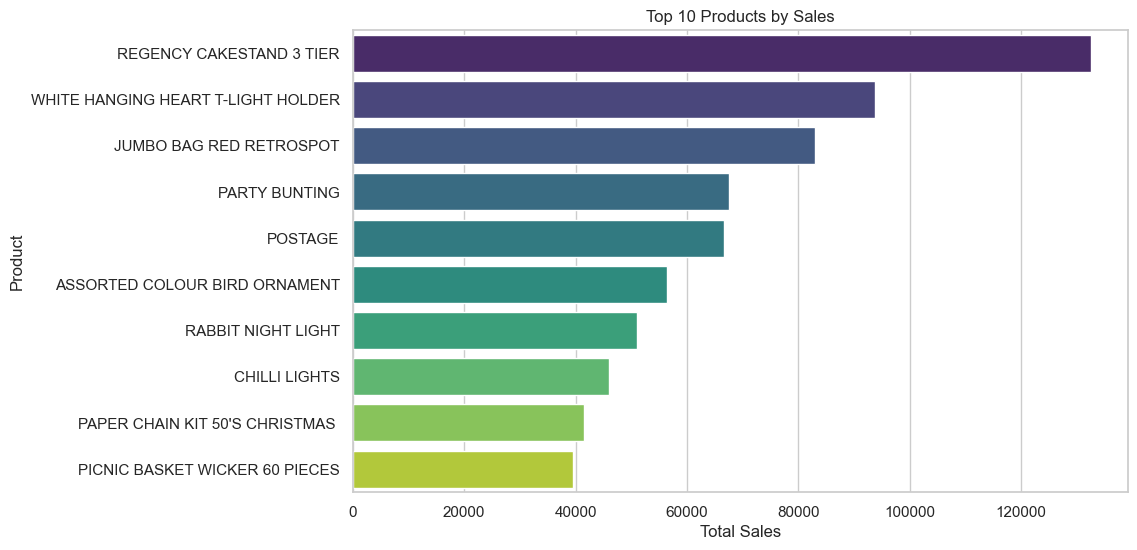

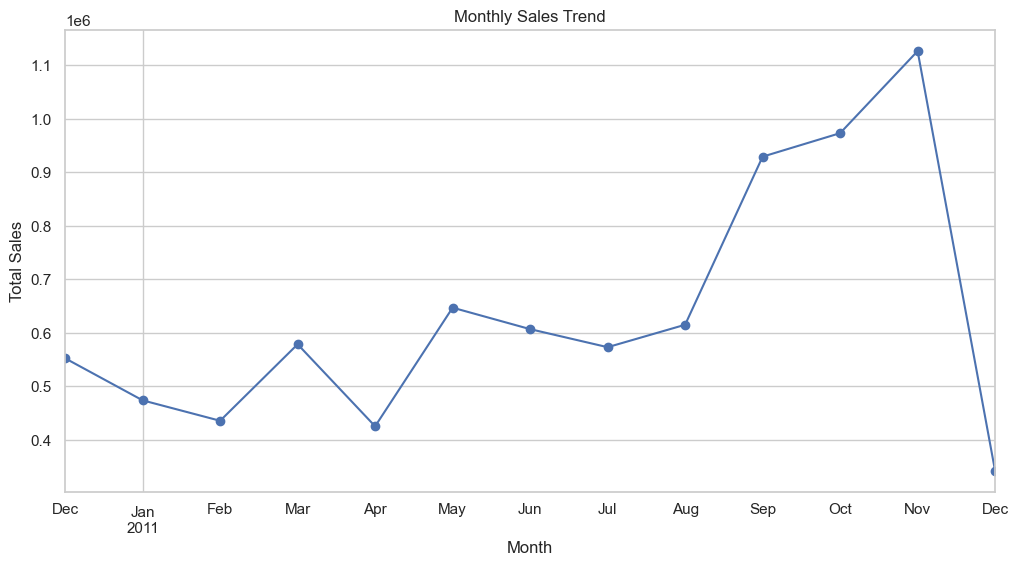

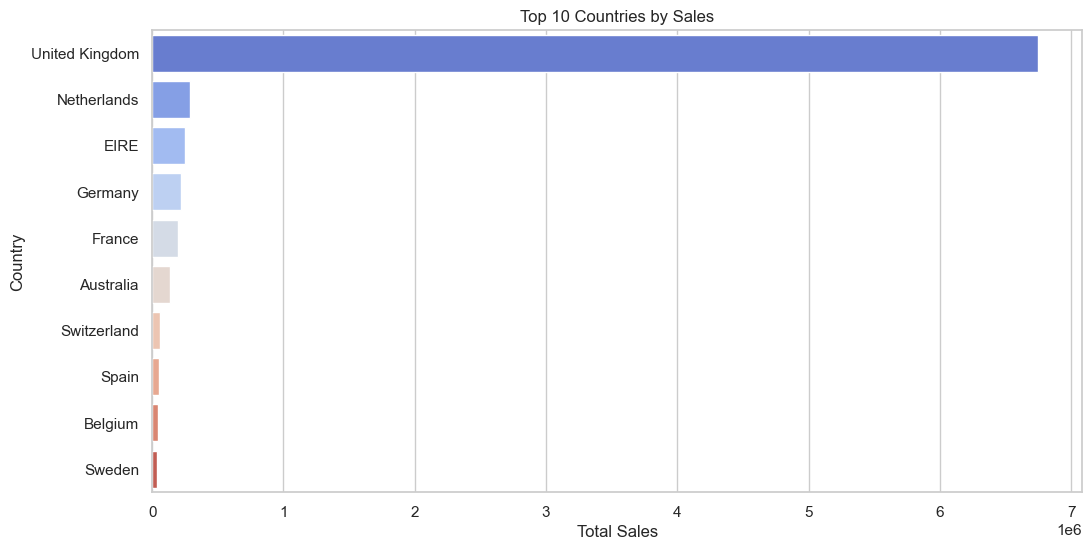

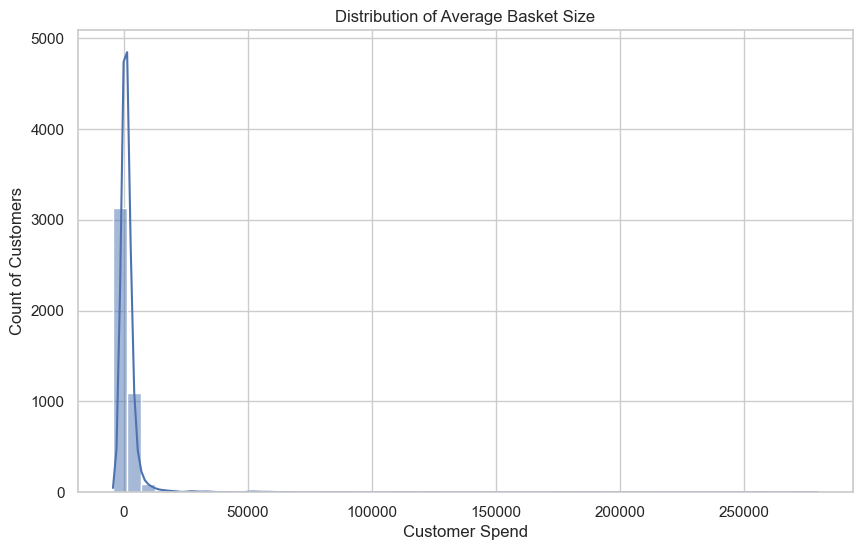

In [25]:
# Histogram of Total Sales
plt.figure(figsize=(8,5))
sns.histplot(df['TotalSales'], bins=50, kde=True)
plt.title("Distribution of Customer Sales")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.show()

# Sales by Product Category (StockCode or Description)
plt.figure(figsize=(10,6))
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

# Sales over time (monthly trend)
plt.figure(figsize=(12,6))
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period("M"))['TotalSales'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Sales by Country
plt.figure(figsize=(12,6))
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=country_sales.values, y=country_sales.index, hue=country_sales.index, palette="coolwarm")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

# Average Basket Size per Customer
plt.figure(figsize=(10,6))
basket_size = df.groupby('CustomerID')['TotalSales'].sum()
sns.histplot(basket_size, bins=50, kde=True)
plt.title("Distribution of Average Basket Size")
plt.xlabel("Customer Spend")
plt.ylabel("Count of Customers")
plt.show()

# 6. Key Insights

In [20]:
"""
1. Sales are concentrated in a few top products (Pareto principle).
2. Sales show strong seasonal/monthly patterns (e.g., spikes around Nov-Dec).
3. The majority of revenue comes from a handful of countries (UK dominates).
4. Customer spending distribution is skewed: a few customers account for most sales.
5. Many invoices are for small quantities, suggesting impulse/low-value purchases.

"""

'\n1. Sales are concentrated in a few top products (Pareto principle).\n2. Sales show strong seasonal/monthly patterns (e.g., spikes around Nov-Dec).\n3. The majority of revenue comes from a handful of countries (UK dominates).\n4. Customer spending distribution is skewed: a few customers account for most sales.\n5. Many invoices are for small quantities, suggesting impulse/low-value purchases.\n\n'